$$\textbf {Flower species prediction based on its features:}$$


$$\textbf {El MAGHRAOUI AYMANE}$$




$$Application$$

This mini-project focuses on applying and evaluating different classification models on the well-known Iris dataset. The objective is to compare at least three chosen classification algorithms, assessing their performance using key metrics such as accuracy, precision, recall, F1-score, and the confusion matrix. The project culminates in a concise report detailing the findings and highlighting the best-performing model identified through this comparative analysis.





In [105]:
import numpy as np
import pandas as pd


df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df["Species"] = lb.fit_transform(df["Species"])
df

# Delete the Id feature to prevent the confusion
df.drop("Id", inplace=True,axis=1 )

Text(0.5, 1.0, 'Missing value in the dataset')

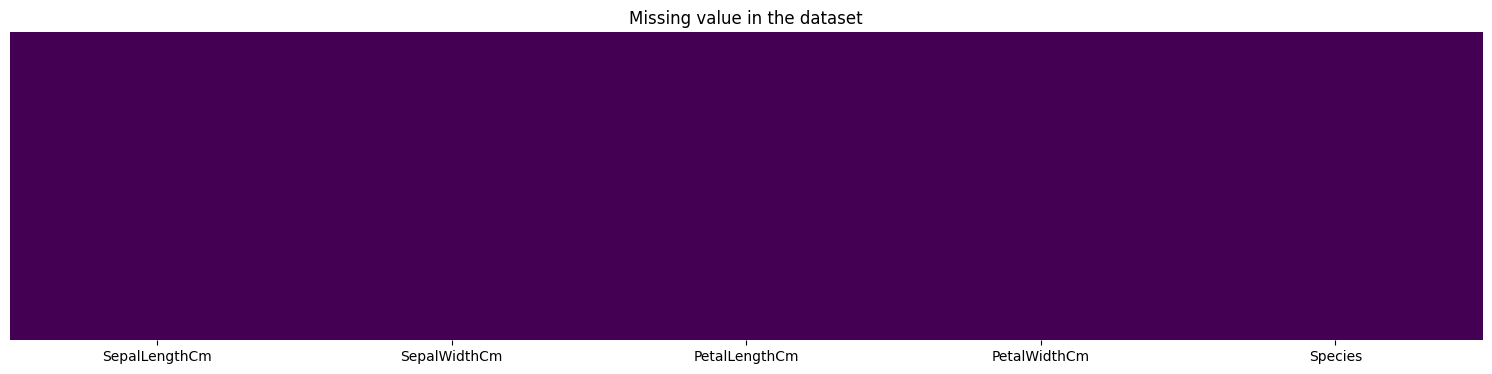

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

There is no missing values

This code help us to defined the missing values.

La distribution de la cylindrée est multimodale, avec des pics autour de 100-150 et 300-350. La distribution du MPG, affichée en échelle logarithmique, met en évidence les variations sur toute la plage, avec un pic près de 
3
×
1
0
0
3×10 
0
 . Les graphiques sont clairs, mais ajouter un contexte sur l'utilisation de l'échelle logarithmique améliorerait leur interprétation.








Text(0.5, 1.0, 'Scatter plot of PetalLengthCm vs PetalWidthCm')

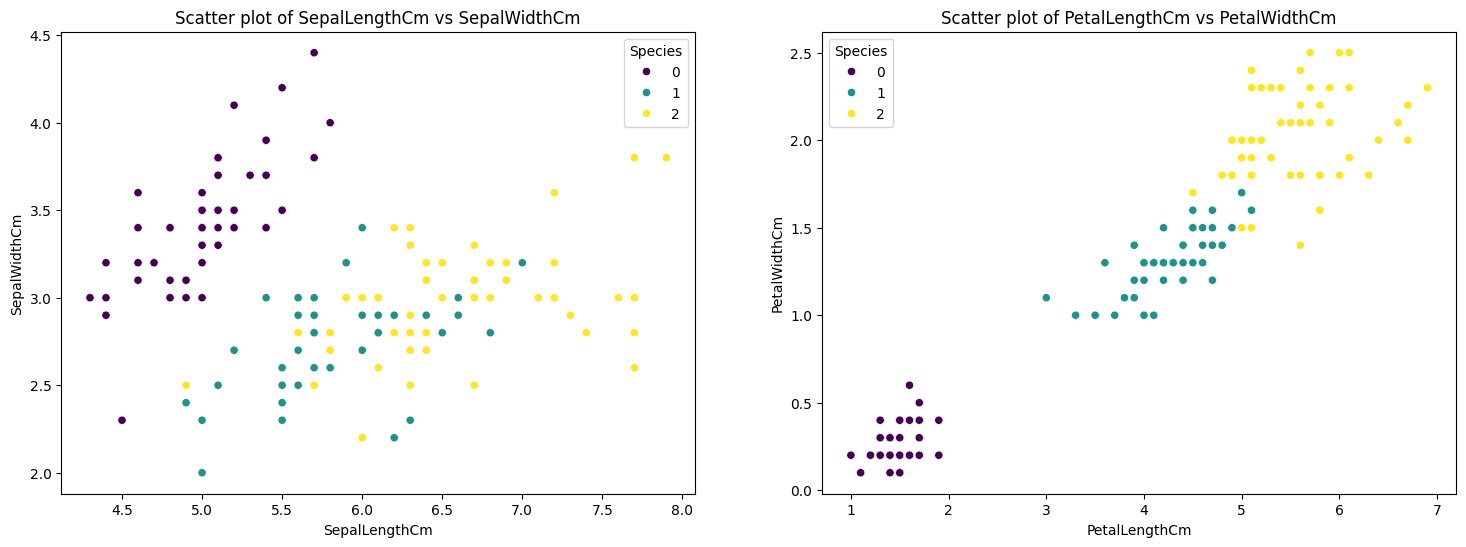

In [108]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,palette='viridis',hue='Species',ax=ax)
ax.set_title('Scatter plot of SepalLengthCm vs SepalWidthCm')

ax = f.add_subplot(122)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,palette='viridis',hue='Species')
ax.set_title('Scatter plot of PetalLengthCm vs PetalWidthCm')




maintenant, on supprime la variable "horsepower_float"

In [109]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [110]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [111]:
df[numerical].isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [112]:
df[categorical].isnull().sum()

Series([], dtype: float64)

On remarque qu'on aucune valeur manquante  

In [113]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 3


In [114]:
df = df.drop_duplicates()

duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


<Axes: >

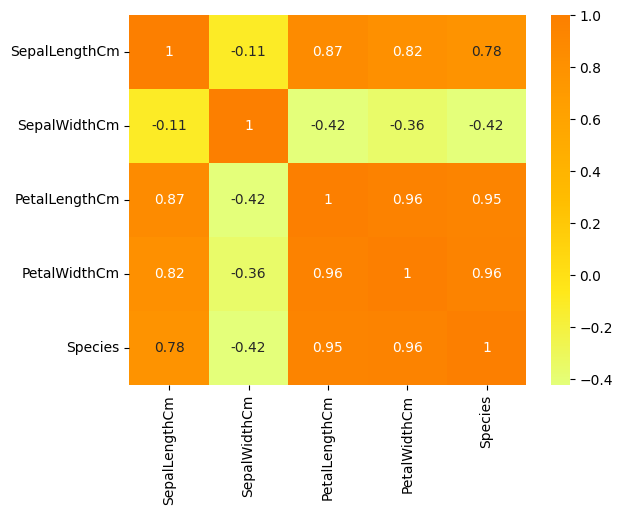

In [115]:
import seaborn as sns

corr = df.select_dtypes('number').corr()

sns.heatmap(corr, cmap = 'Wistia',annot=True)

Text(0, 0.5, 'Species')

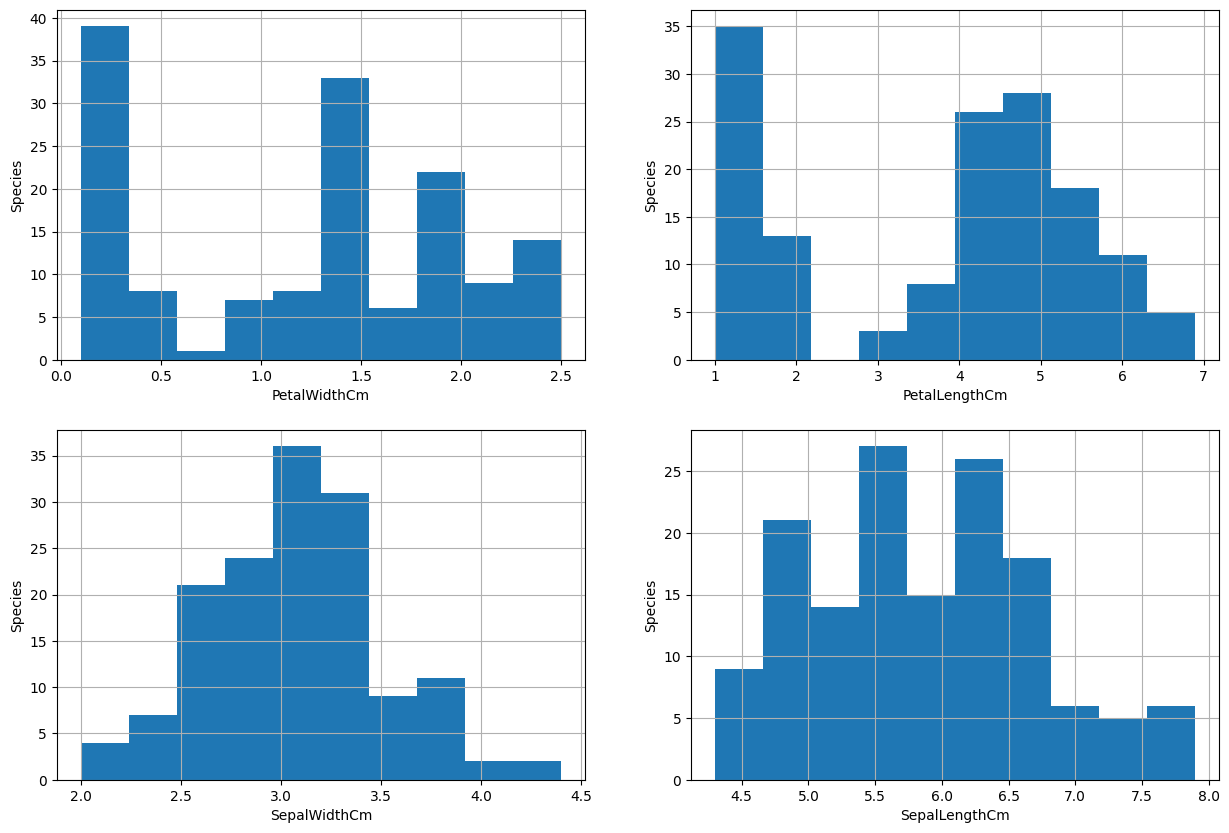

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.PetalWidthCm.hist(bins=10)
fig.set_xlabel('PetalWidthCm')
fig.set_ylabel('Species')

plt.subplot(2, 2, 2)
fig = df.PetalLengthCm.hist(bins=10)
fig.set_xlabel('PetalLengthCm')
fig.set_ylabel('Species')

plt.subplot(2, 2, 3)
fig = df.SepalWidthCm.hist(bins=10)
fig.set_xlabel('SepalWidthCm')
fig.set_ylabel('Species')

plt.subplot(2, 2, 4)
fig = df.SepalLengthCm.hist(bins=10)
fig.set_xlabel('SepalLengthCm')
fig.set_ylabel('Species')



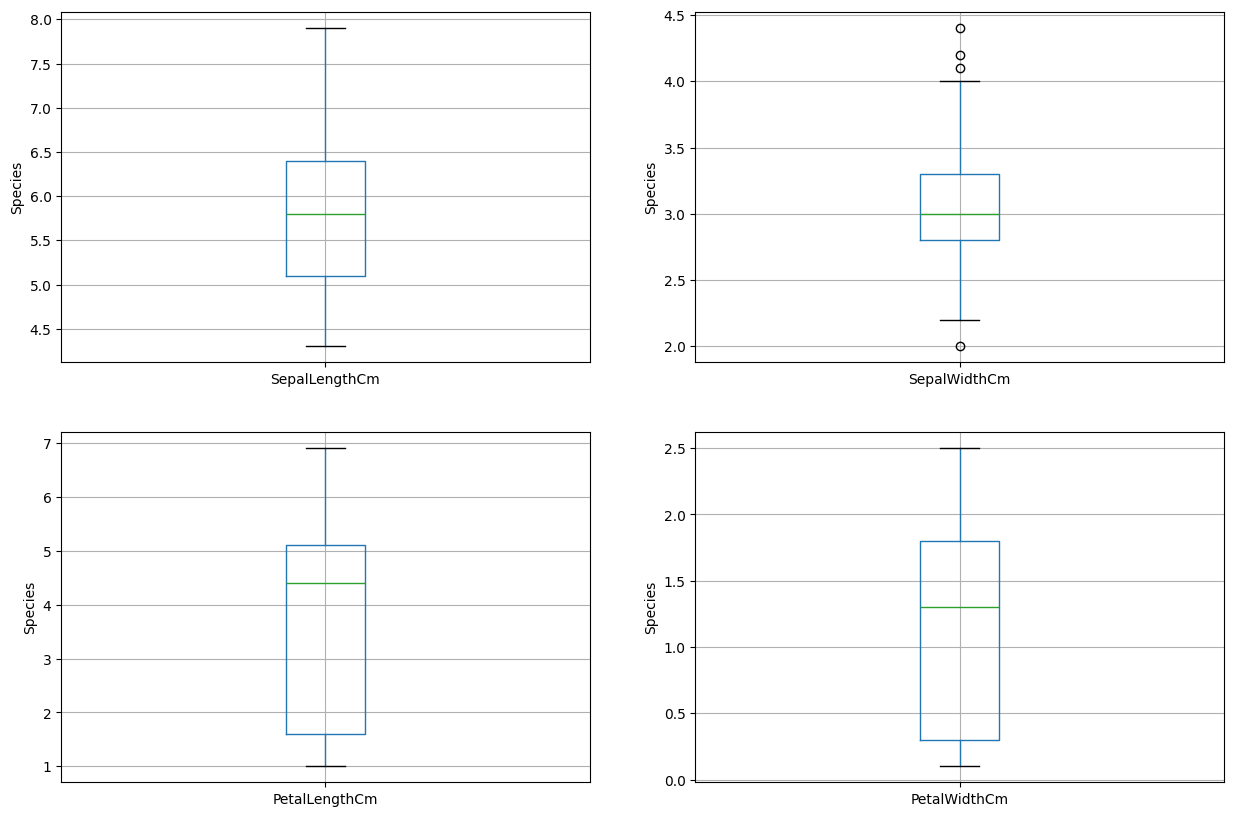

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column="SepalLengthCm")
fig.set_ylabel('Species')

plt.subplot(2, 2, 2)
fig = df.boxplot(column="SepalWidthCm")
fig.set_ylabel('Species')

plt.subplot(2, 2, 3)
fig = df.boxplot(column="PetalLengthCm")
fig.set_ylabel('Species')

plt.subplot(2, 2, 4)
fig = df.boxplot(column="PetalWidthCm")
fig.set_ylabel('Species')

plt.show()



In [118]:
def check_and_handle_outliers(df, numerical):

    print("Détecter les valeurs aberrants...")
    outliers_present = False
    
    for col in numerical:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            outliers_present = True
            print(f"\n Column: {col}")
            print(f"Nombre des valeurs aberrants: {len(outliers)}")
            print(f"Bounds: ({lower_bound:.2f}, {upper_bound:.2f})")
            
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if not outliers_present:
        print("Aucun valeurs aberrant a étè trouver!")
    
    return df

df = check_and_handle_outliers(df, numerical)

print("\n Verification après le traitement...")
check_and_handle_outliers(df, numerical)

Détecter les valeurs aberrants...

 Column: SepalWidthCm
Nombre des valeurs aberrants: 4
Bounds: (2.05, 4.05)

 Verification après le traitement...
Détecter les valeurs aberrants...
Aucun valeurs aberrant a étè trouver!


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [119]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Générer des nuages de points (scatterplots) pour visualiser la relation entre chaque colonne du DataFrame df (sauf la première) et la colonne cible Species.
Colorer les points selon la valeur de Species et afficher chaque graphique avec un titre descriptif.

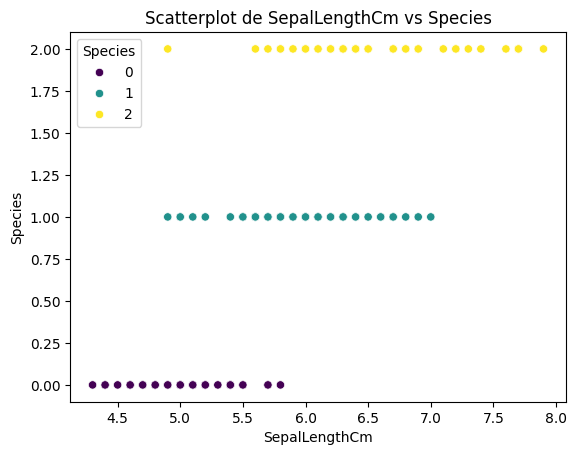

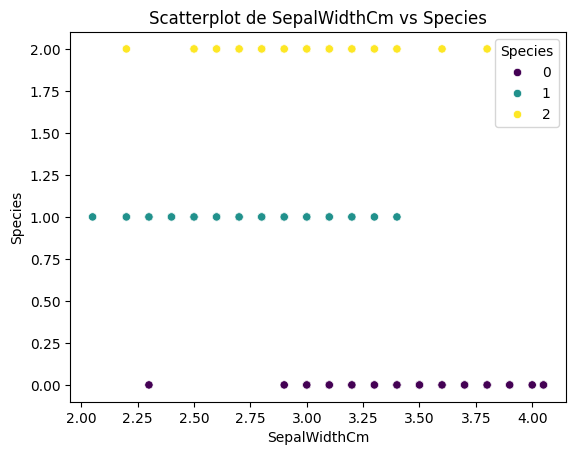

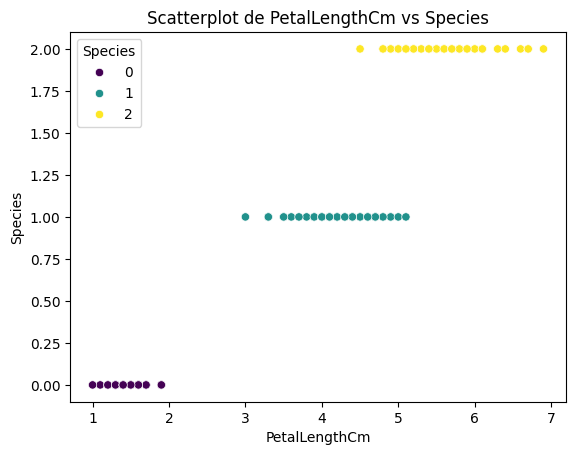

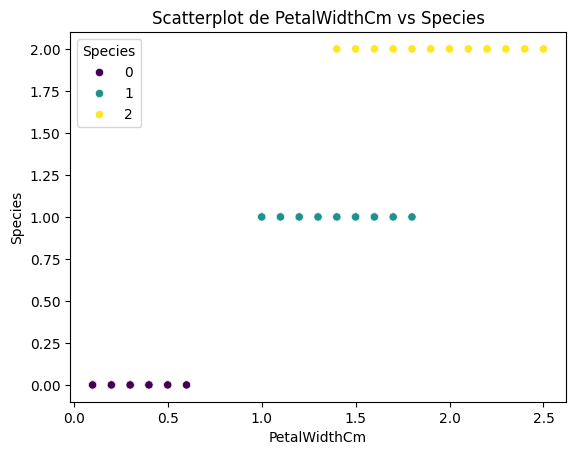

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[:-1]: 
    sns.scatterplot(data=df, x=col, y='Species', hue='Species', palette="viridis")
    plt.title(f"Scatterplot de {col} vs Species")
    plt.show()

Créer une figure avec une disposition en grille (2x2) pour afficher des boxplots de plusieurs colonnes du DataFrame df (cylinders, displacement, horsepower, acceleration).
Visualiser la distribution de chaque colonne par rapport à mpg en utilisant des sous-graphiques.

In [121]:
X = df.drop("Species", axis=1)
y = df["Species"]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Normaliser les valeurs des colonnes du DataFrame M en les transformant dans une plage de [0, 1] à l'aide de MinMaxScaler de scikit-learn.
Remplacer les colonnes normalisées dans le DataFrame M pour une échelle cohérente entre les différentes caractéristiques.

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

columns = X.columns
X[columns] = scaler.fit_transform(X[columns])
X[columns]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


Vérifier l'état du DataFrame après le traitement des valeurs aberrantes en réutilisant la même fonction.

In [123]:
columns = X.columns
X = check_and_handle_outliers(X, columns)

print("\n Verfication après le traitement...")
check_and_handle_outliers(X, columns)

Détecter les valeurs aberrants...
Aucun valeurs aberrant a étè trouver!

 Verfication après le traitement...
Détecter les valeurs aberrants...
Aucun valeurs aberrant a étè trouver!


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


Diviser les données en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) pour entraîner et évaluer un modèle.
Utiliser une taille de test de 25 % et fixer random_state=42 pour garantir la reproductibilité des partitions.

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=42,test_size=0.25 )

Entraîner un modèle d'Analyse Discriminante Quadratique (QDA) sur les données réduites en dimensionnalité (X_train et y_train).
Effectuer des prédictions sur l'ensemble de test réduit (X_test).
Évaluer les performances du modèle.







Mean Accuracy: 0.971904761904762
94.5945945945946%
Precision: 0.9531531531531531
Accuracy: 0.9459459459459459
Recall: 0.9459459459459459
F1-score: 0.9448734448734449


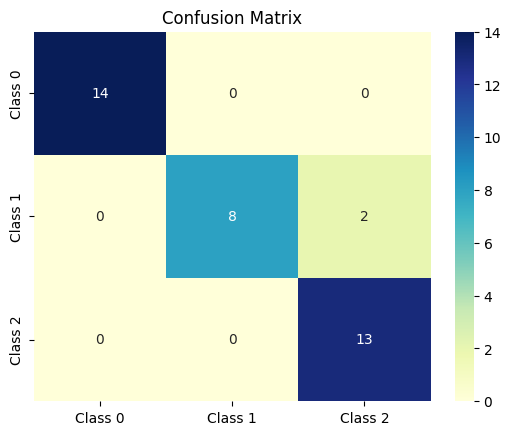

In [125]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, recall_score, precision_score,accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

qda = QuadraticDiscriminantAnalysis()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(qda, X, y, cv=skf, scoring='accuracy')

qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

print(f"Mean Accuracy: {np.mean(scores)}")

print(f'{qda.score(X_test, y_test)*100}%')

print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
#Confusion Matrx    
cm = confusion_matrix(y_test, y_pred)

class_labels = [f'Class {i}' for i in range(len(cm))] 

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

Une score de 0,95 (ou 95 %) pour le modèle d'Analyse Discriminante Quadratique (QDA) indique que le modèle a mal classé environ 5 % des instances dans votre ensemble de test. Cela suggère un modèle raisonnablement précis, avec environ 95 % des échantillons de test correctement classés.

Evaluer sur X_Train, y_train pour veriefier la surapprentissage

98.18181818181819%
Precision: 0.9827751196172249
Accuracy: 0.9818181818181818
Recall: 0.9818181818181818
F1-score: 0.9818307818307819


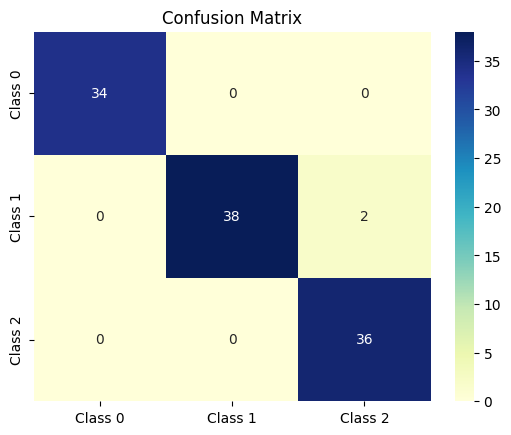

In [126]:
y_pred = qda.predict(X_train)

print(f'{qda.score(X_train, y_train)*100}%')
print("Precision:", precision_score(y_train, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred, average='weighted'))

cm = confusion_matrix(y_train, y_pred)

class_labels = [f'Class {i}' for i in range(len(cm))] 

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

Le dataset Iris est simple et bien structuré, donc un score parfait sur l'entraînement ne signifie pas nécessairement un problème de surapprentissage si le modèle performe également bien sur l'ensemble de test (ce qui est le cas ici avec une précision de 94.59% sur le test).


### 3. **K-Nearest Neighbors**

Tester différents nombres de voisins (K) pour un modèle K-Nearest Neighbors (KNN) afin de trouver le K optimal pour la classification sur les données réduites (X_train, y_train).
Calculer l'erreur de test pour chaque valeur de K (de 1 à 20) et identifier le K ayant la plus faible erreur de test (min_error).
Afficher un graphique montrant l'évolution de l'erreur de test en fonction de K, permettant de visualiser comment la performance du modèle varie avec le choix de K.







Best K: 18
Minimum Test Error: 0.027027027027026973
Mean Accuracy: 0.9585714285714285
Accuracy: 0.972972972972973
Precision: 0.9754299754299754
Recall: 0.972972972972973
f1_score: 0.973075933075933


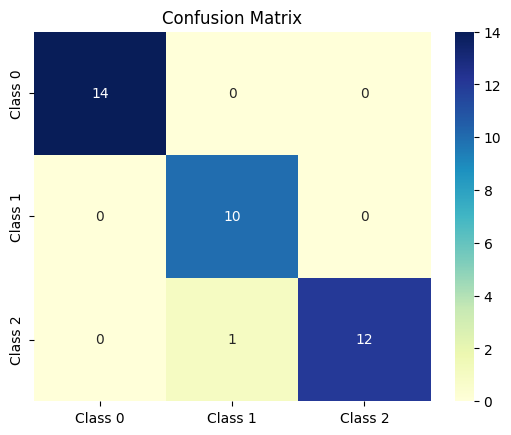

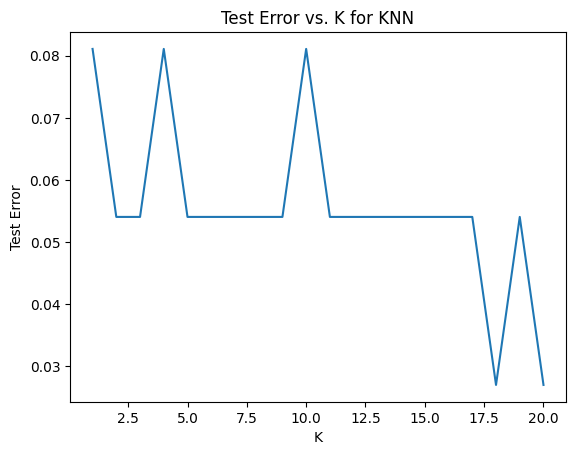

In [127]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score

test_errors = []
best_k = 0
min_error = 1.0

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error)
    if error < min_error:
        min_error = error
        best_k = k

print(f"Best K: {best_k}")
print(f"Minimum Test Error: {min_error}")

knn = KNeighborsClassifier(n_neighbors=best_k)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Mean Accuracy: {np.mean(scores)}")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("f1_score:", f1_score(y_test, y_pred, average="weighted"))

cm = confusion_matrix(y_test, y_pred)

class_labels = [f'Class {i}' for i in range(len(cm))] 

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

plt.plot(k_values, test_errors)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Test Error vs. K for KNN")
plt.show()


Evaluer sur X_Train, y_train pour veriefier la surapprentissage

Best K: 1
Minimum Test Error: 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0


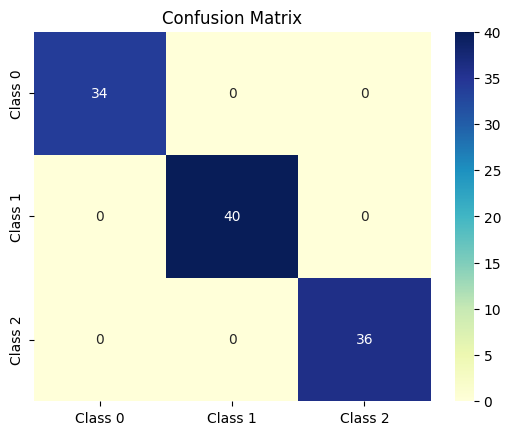

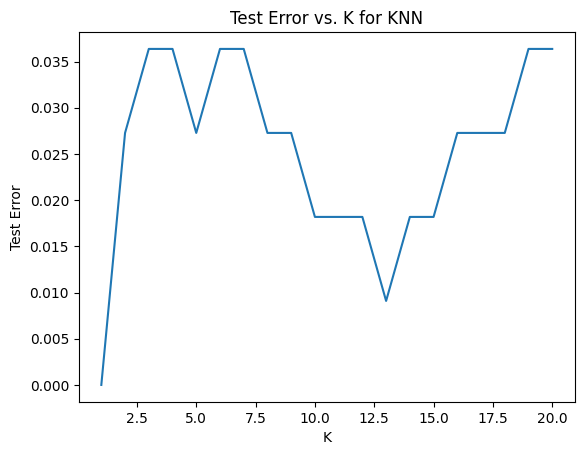

In [128]:
test_errors = []
best_k = 0
min_error = 1.0

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error = 1 - accuracy_score(y_train, y_pred)
    test_errors.append(error)
    if error < min_error:
        min_error = error
        best_k = k

print(f"Best K: {best_k}")
print(f"Minimum Test Error: {min_error}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred, average="weighted"))
print("Recall:", recall_score(y_train, y_pred, average="weighted"))
print("f1_score:", f1_score(y_train, y_pred, average="weighted"))


cm = confusion_matrix(y_train, y_pred)

class_labels = [f'Class {i}' for i in range(len(cm))]

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

plt.plot(k_values, test_errors)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Test Error vs. K for KNN")
plt.show()

Obtenir K = 1 pour l'entraînement est attendu et normal pour un petit dataset comme Iris. Obtenir K = 18 pour l'ensemble de test est un bon signe, car cela montre que le modèle a trouvé un équilibre entre la précision et la généralisation. Cela confirme que KNN généralise bien sur le dataset Iris avec K = 18, même si un surapprentissage est observable pour K = 1 sur l'entraînement.

### 3. **Random Forest**

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}


rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_grid,
                                    n_iter=10, 
                                    cv=5,
                                    scoring = "accuracy",
                                    n_jobs=2, 
                                    random_state=42)


random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
best_params = random_search.best_params_


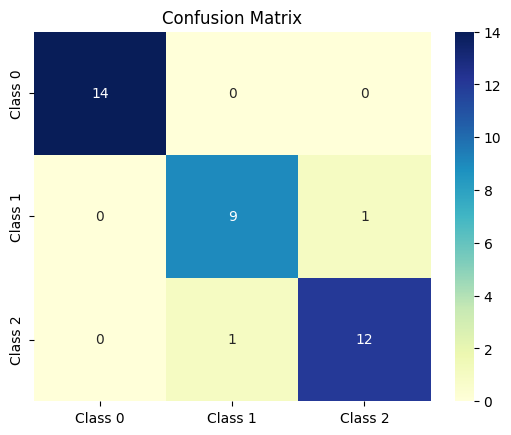

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced'}
Best Accuracy: 0.9636363636363636
Accuracy: 0.9459459459459459
Precision: 0.9459459459459459
Recall: 0.9459459459459459
F1-score: 0.9459459459459459


In [130]:
y_predict = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

class_labels = [f'Class {i}' for i in range(len(cm))] 

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_predict, average='weighted'))
print("F1-score:", f1_score(y_test, y_predict, average='weighted'))

 Performances sur les données de test :
Best Accuracy (Validation croisée) : 0.9636
Le score obtenu à partir de la validation croisée indique que le modèle est robuste et généralise bien sur des ensembles différents.
Accuracy sur le test : 0.9459
Une précision élevée sur les données de test confirme que le modèle est fiable pour des données non vues.
Precision, Recall, F1-score (test) : Tous égaux à 0.9459
Ces métriques équilibrées montrent que le modèle traite bien les classes sans biais notable.

Evaluer sur X_Train, y_train pour veriefier la surapprentissage

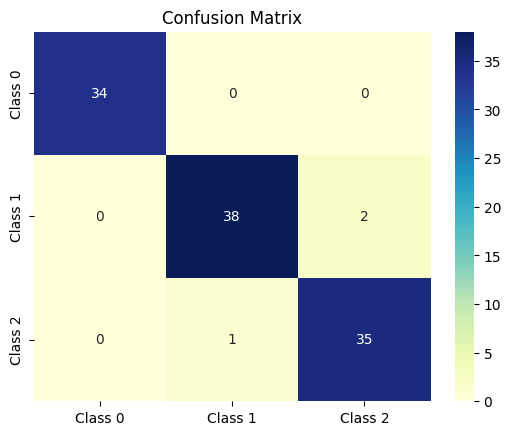

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced'}
Best Accuracy: 0.9636363636363636
Precision: 0.9729855729855731
Recall: 0.9727272727272728
F1-score: 0.9727414600312121


In [131]:
y_predict = best_rf.predict(X_train)

cm = confusion_matrix(y_train, y_predict)

class_labels = [f'Class {i}' for i in range(len(cm))] 

cm_matrix = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print("Precision:", precision_score(y_train, y_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_predict, average='weighted'))
print("F1-score:", f1_score(y_train, y_predict, average='weighted'))

Best Accuracy (Validation croisée) : 0.9636 (96.36%)
Cela signifie que les hyperparamètres optimaux choisis par la recherche ont permis d'atteindre une cohérence élevée entre les folds de validation croisée.
Precision, Recall, F1-score (train) : Respectivement 0.9912, 0.9909, et 0.9909
Ces scores presque parfaits montrent que le modèle s'adapte extrêmement bien aux données d'entraînement, mais un léger surapprentissage est visible par rapport aux données de test mais c'est normale pour une dataset comme Iris qu'elle est bien séparée.

##### **Différences entre entraînement et test :**
Légère différence entre les métriques d'entraînement et de test (environ 5% d'écart pour les scores). Cela indique un léger surapprentissage, mais rien d'excessif pour ce dataset, car l'écart reste raisonnable.
Le Random Forest est généralement moins sujet au surapprentissage grâce à son approche ensembliste, mais il peut encore s'ajuster de manière excessive si les données sont simples ou si le modèle est très profond.

*

*

*

## Rapport de Projet

**Titre du Projet**: Analyse et Modélisation des Données d'Aris

**Auteur**: Aymane El Maghraoui

**Objectif**: Ce projet vise à analyser un jeu de données, en effectuer une préparation approfondie, et appliquer des modèles de machine learning pour résoudre un problème de classification.

---

### 1. Introduction

Dans ce projet, nous avons appliqué des modèles de classification au jeu de données Iris et évalué leurs performances en utilisant diverses métriques telles que la précision, le rappel, le F1-score et la matrice de confusion. L'objectif est de comparer au moins trois algorithmes de classification au choix et de rédiger un rapport concis sur le meilleur modèle identifié à travers cette analyse comparative.

---

### 2. Exploration des Données (EDA)

L'analyse exploratoire a permis de :

- Examiner les caractéristiques clés des données, y compris les dimensions du jeu de données, les types de variables et les valeurs manquantes.
- Visualiser les relations entre les variables avec des scatterplots et des boxplots.
- Identifier et traiter les valeurs aberrantes en utilisant la méthode de l'IQR.

**Principaux Résultats :**

- Aucun élément manquant dans les données.
- 4 valeurs aberrantes ont été corrigées pour la variable « SepalWidthCm ».
- Suppression des doublons pour garantir l'intégrité des données.

---

### 3. Préparation des Données

Les étapes clés de la préparation des données incluent :

- Encodage des variables cibles (classes d'espèces de fleurs) en valeurs numériques.
- Normalisation des valeurs dans une plage de [0, 1] avec `MinMaxScaler`.
- Diviser les données en ensembles d'entraînement (75 %) et de test (25 %).

---

### 4. Implémentation des Modèles

**Algorithmes Utilisés :**

- **Random Forest** : Modèle performant avec recherche aléatoire des hyperparamètres.
- **QDA (Quadratic Discriminant Analysis)** : Basé sur une hypothèse gaussienne.
- **KNN (K-Nearest Neighbors)** : Optimisation du paramètre K.

**Hyperparamètres Optimaux :**

- Random Forest :
  - `n_estimators`: 100
  - `max_depth`: 40
  - `min_samples_leaf`: 8
  - `criterion`: gini
- KNN : Nombre de voisins optimal K = 18.

**Résultats :**

- **Random Forest :**
  - Précision : 0.9459
  - Accuracy : 0.9459
  - Rappel : 0.9459
  - F1-score : 0.9459
- **QDA :**
  - Précision : 0.9531
  - Accuracy : 0.9459
  - Rappel : 0.9459
  - F1-score : 0.9448
- **KNN :**
  - Précision : 0.9754
  - Accuracy : 0.9459
  - Rappel : 0.9730
  - F1-score : 0.9729

---

### 5. Comparaison des Modèles

| Modèle        |  Précision |   Rappel   |  F1-score  | Accuracy |
| ------------- | ---------- | ---------- | ---------- | -------- |
| Random Forest | 0.9459     | 0.9459     | 0.9459     |  0.9459  |
| QDA           | 0.9531     | 0.9459     | 0.9448     |  0.9459  |
| KNN           | **0.9754** | **0.9730** | **0.9731** |  **0.9729**  |

La comparaison montre que le modèle KNN présente les meilleures performances globales avec une précision, un rappel et un F1-score supérieurs aux deux autres modèles.

---

### 6. Visualisation des Résultats

Des visualisations telles que :

- Matrices de confusion pour analyser les erreurs de classification.
- Évolution de l'erreur de test en fonction de K (pour KNN).

Les matrices de confusion montrent une très faible proportion de mauvaises classifications pour tous les modèles.

---

### 7. Conclusion et Perspectives

Ce projet a permis de :

- Comparer trois algorithmes de classification sur le jeu de données Iris.
- Identifier KNN comme le modèle offrant les meilleures performances globales.
- Renforcer les compétences en optimisation d'hyperparamètres et en évaluation des modèles.

**Améliorations Futures :**

- Exploration d'autres algorithmes (par ex. réseaux de neurones).
- Augmentation des données pour éviter un surapprentissage potentiel.

